# Przetwarzanie wstępne. Filtracja kontekstowa.


### Cel:
- zapoznanie z pojęciem kontekstu / filtracji kontekstowej,
- zapoznanie z pojęciem konwolucji (splotu),
- zapoznanie z wybranymi filtrami:
	- filtry liniowe dolnoprzepustowe:
		- filtr uśredniający,
		- filtr Gaussa.
	- filtry nielinowe:
		- mediana,
		- mediana dla obrazów kolorowych.
	- filtry liniowe górnoprzepustowe:
			- laplasjan,
			- operator Robersta, Prewitta, Sobela.
- zadanie domowe: adaptacyjna filtracja medianowa.

### Filtry liniowe uśredniające (dolnoprzepustowe)

Jest to podstawowa rodzina filtrów stosowana w cyfrowym przetwarzaniu obrazów.
Wykorzystuje się je w celu "rozmazania" obrazu i tym samym redukcji szumów (zakłóceń) na obrazie.
Filtr określony jest przez dwa parametry: rozmiar maski (ang. _kernel_) oraz wartości współczynników maski.

Warto zwrócić uwagę, że omawiane w niniejszym rozdziale operacje generują nową wartość piksela na podstawie pewnego fragmentu obrazu (tj. kontekstu), a nie jak operacje punktowe tylko na podstawie jednego piksela.


1. Wczytaj obraz _plansza.png_.
W dalszej części ćwiczenia sprawdzenie działania filtracji dla innych obrazów sprowadzi się do wczytania innego pliku.

2. Podstawowa funkcja to `cv2.filter2D`  - realizacja filtracji konwolucyjnej.
   Proszę sprawdzić jej dokumentację i zwrócić uwagę na obsługę problemu brzegowego (na krawędziach istnieją piksele dla których nie da się wyznaczyć otoczenia).

  Uwaga. Problem ten można też rozwiązać z użyciem funkcji `signal.convolve2d` z biblioteki _scipy_ (`from scipy import signal`).

3. Stwórz podstawowy filtr uśredniający o rozmiarze $3 \times 3$ -- za pomocą funkcji `np.ones`. Wykonaj konwolucję na wczytanym obrazie. Na wspólnym rysunku wyświetl obraz oryginalny, po filtracji oraz moduł z różnicy.

4. Przeanalizuj otrzymane wyniki. Jakie elementy zawiera obraz "moduł z różnicy"? Co na tej podstawie można powiedzieć o filtracji dolnoprzepustowej?

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import os
import requests
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/'

fileNames = ["jet.png", "kw.png", "moon.png", "lenaSzum.png", "lena.png", "plansza.png"]
for fileName in fileNames:
  if not os.path.exists(fileName):
      r = requests.get(url + fileName, allow_redirects=True)
      open(fileName, 'wb').write(r.content)



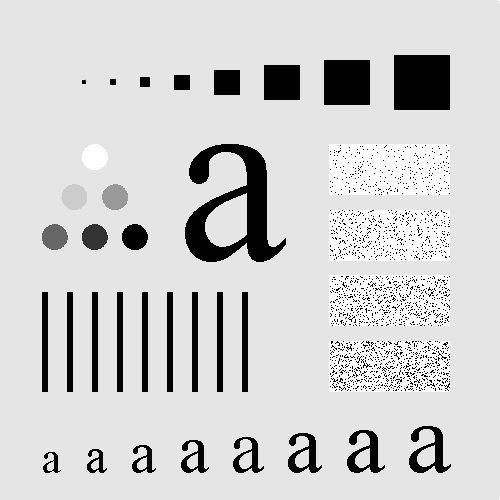

In [ ]:
#1
image = cv2.imread("plansza.png", cv2.IMREAD_GRAYSCALE)
cv2_imshow(image)

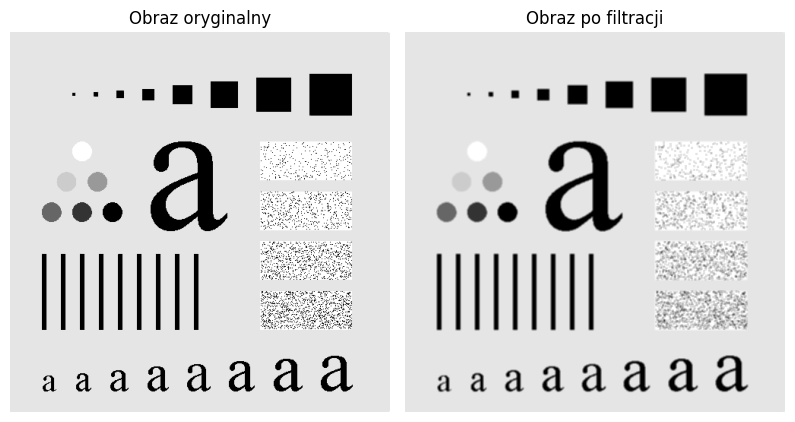

In [ ]:
#3
kernel = np.ones((3, 3), dtype=np.float32) / 9
filtered_image = cv2.filter2D(image, -1, kernel, borderType=cv2.BORDER_DEFAULT)



plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Obraz oryginalny')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Obraz po filtracji')
plt.axis('off')


plt.tight_layout()
plt.show()

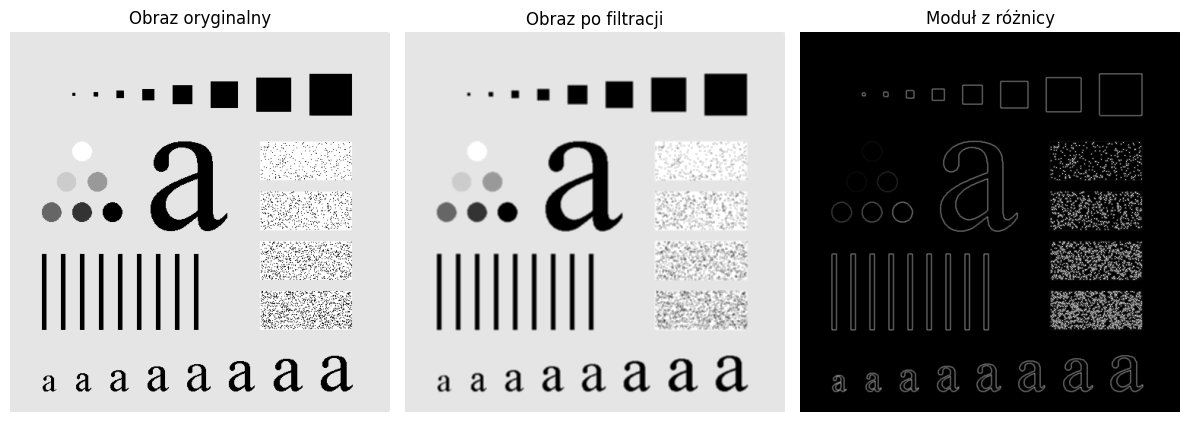

In [ ]:
difference = cv2.absdiff(image, filtered_image)

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Obraz oryginalny')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Obraz po filtracji')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(difference, cmap='gray')
plt.title('Moduł z różnicy')
plt.axis('off')


plt.tight_layout()
plt.show()

5. Na wspólnym rysunku wyświetl wyniki filtracji uśredniającej z oknem o rozmiarze 3, 5, 9, 15 i 35.
Wykorzystaj polecenie `plt.subplot`.
Przeanalizuj wpływ rozmiaru maski na wynik.

In [ ]:
def show_filter_for_image(image):
  filtered = []
  differences = []

  kernels = [3,5,9,15,35]

  for kernel_size in kernels:
    kernel = np.ones((kernel_size,kernel_size), dtype = np.float32) / (kernel_size * kernel_size)
    filtered_image = cv2.filter2D(image, -1, kernel, borderType=cv2.BORDER_DEFAULT)
    difference = cv2.absdiff(image, filtered_image)

    filtered.append(filtered_image)
    differences.append(difference)

  plt.figure(figsize=(7, 10))
  for i in range(len(filtered)):

    plt.subplot(len(filtered), 2, 2*i + 1)
    plt.imshow(filtered[i], cmap='gray')
    plt.title(f'Obraz po filtracji maską rozmiaru: {kernels[i]}x{kernels[i]}')
    plt.axis('off')

    plt.subplot(len(filtered), 2, 2*i + 2)
    plt.imshow(differences[i], cmap='gray')
    plt.title('Moduł z różnicy')
    plt.axis('off')



  plt.tight_layout()
  plt.show()



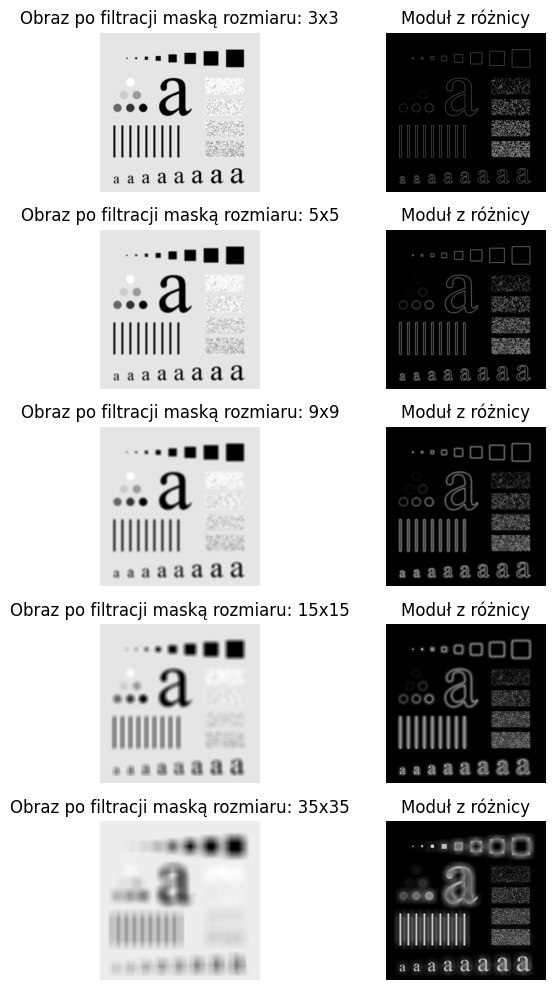

In [ ]:
show_filter_for_image(image)

6. Wczytaj obraz _lena.png_.
Zaobserwuj efekty filtracji dolnoprzepustowej dla obrazu rzeczywistego.

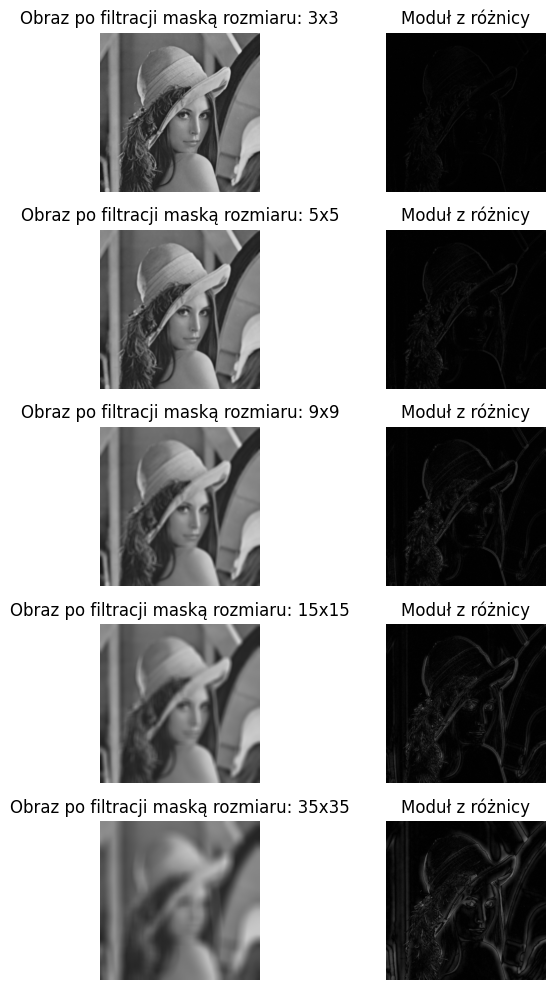

In [ ]:
lena = cv2.imread("lena.png")
show_filter_for_image(lena)

7. Niekorzystny efekt towarzyszący wykonanym filtracjom dolnoprzepustowym to utrata ostrości.
Częściowo można go zniwelować poprzez odpowiedni dobór maski.
Wykorzystaj maskę:  `M = np.array([1 2 1; 2 4 2; 1 2 1])`.
Przed obliczeniami należy jeszcze wykonać normalizację - podzielić każdy element maski przez sumę wszystkich elementów: `M = M/sum(sum(M));`.
Tak przygotowaną maskę wykorzystaj w konwolucji - wyświetl wyniki tak jak wcześniej.
Możliwe jest też wykorzystywanie innych masek - współczynniki można dopasowywać do konkretnego problemu.

In [ ]:
def show_filter_for_image_with_mask(image, kernel):
  filtered_image = cv2.filter2D(image, -1, kernel, borderType=cv2.BORDER_DEFAULT)
  difference = cv2.absdiff(image, filtered_image)

  plt.figure(figsize=(12, 6))
  plt.subplot(1, 3, 1)
  plt.imshow(image, cmap='gray')
  plt.title('Obraz oryginalny')
  plt.axis('off')

  plt.subplot(1, 3, 2)
  plt.imshow(filtered_image, cmap='gray')
  plt.title('Obraz po filtracji')
  plt.axis('off')

  plt.subplot(1, 3, 3)
  plt.imshow(difference, cmap='gray')
  plt.title('Moduł z różnicy')
  plt.axis('off')


  plt.tight_layout()
  plt.show()


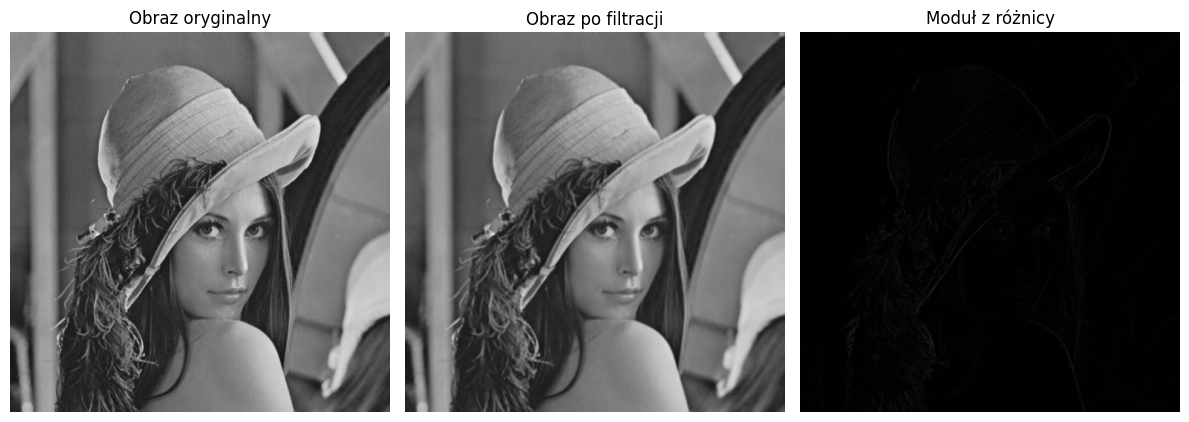

In [ ]:
mask = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
]
)
mask = mask / sum(sum(mask))

show_filter_for_image_with_mask(lena,mask)

8. Skuteczną i często wykorzystywaną maską jest tzw. maska Gasussa.
Jest to zbiór liczb, które aproksymują dwuwymiarowy rozkład Gaussa.
Parametrem jest odchylenie standardowe i rozmiar maski.

9. Wykorzystując przygotowaną funkcję `fgaussian` stwórz maskę o rozmiarze $5 \times 5$ i odchyleniu standardowym 0.5.
  Wykorzystując funkcję `mesh` zwizualizuj filtr.
  Sprawdź jak parametr ``odchylenie standardowe'' wpływa na ``kształt'' filtru.

  Uwaga. W OpenCV dostępna jest *dedykowana* funkcja do filtracji Gaussa - `GaussianBlur`.
  Proszę na jednym przykładzie porównać jej działanie z użytym wyżej rozwiązaniem.

10. Wykonaj filtrację dla wybranych (2--3) wartości odchylenia standardowego.


In [ ]:
def fgaussian(size, sigma):
     m = n = size
     h, k = m//2, n//2
     x, y = np.mgrid[-h:h+1, -k:k+1]
     g = np.exp(-(x**2 + y**2)/(2*sigma**2))
     return g /g.sum()


def mesh(fun, size):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')


    X = np.arange(-size//2, size//2, 1)
    Y = np.arange(-size//2, size//2, 1)
    X, Y = np.meshgrid(X, Y)
    Z = fun

    ax.plot_surface(X, Y, Z)

    plt.show()




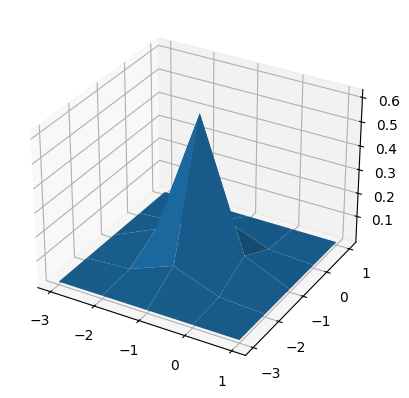

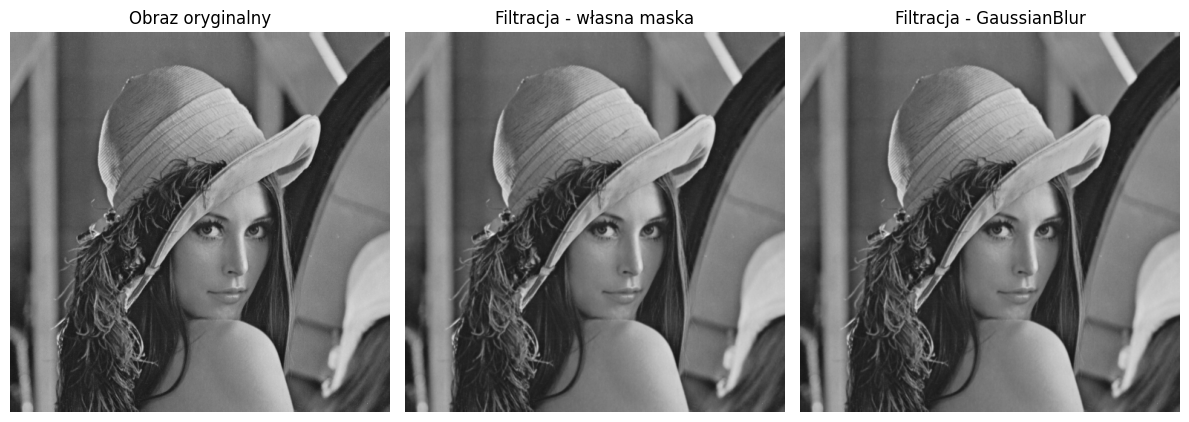

In [ ]:
#9
size = 5
sigma = 0.5

gaussian_kernel = fgaussian(size, sigma)

mesh(gaussian_kernel, size)

my_filtered_image = cv2.filter2D(lena, -1, gaussian_kernel, borderType=cv2.BORDER_DEFAULT)

opencv_filtered_image = cv2.GaussianBlur(lena, (size,size), sigma)

plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plt.imshow(lena, cmap='gray')
plt.title('Obraz oryginalny')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(my_filtered_image, cmap='gray')
plt.title('Filtracja - własna maska')
plt.axis('off')


plt.subplot(1, 3, 3)
plt.imshow(opencv_filtered_image, cmap='gray')
plt.title('Filtracja - GaussianBlur')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
#10
def gaussian_filtration(size,sigma):
  gaussian_kernel = fgaussian(size, sigma)

  mesh(gaussian_kernel, size)

  my_filtered_image = cv2.filter2D(lena, -1, gaussian_kernel, borderType=cv2.BORDER_DEFAULT)

  plt.figure(figsize=(10, 5))
  plt.subplot(1, 3, 1)
  plt.imshow(lena, cmap='gray')
  plt.title('Obraz oryginalny')
  plt.axis('off')

  plt.subplot(1, 3, 2)
  plt.imshow(my_filtered_image, cmap='gray')
  plt.title('Obraz po filtracji')
  plt.axis('off')

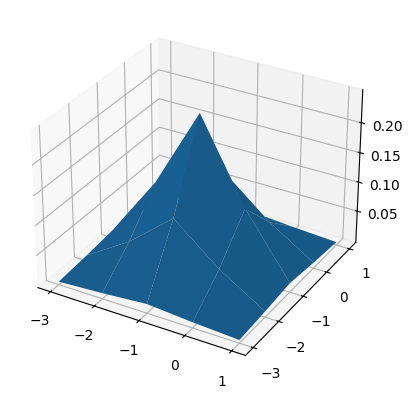

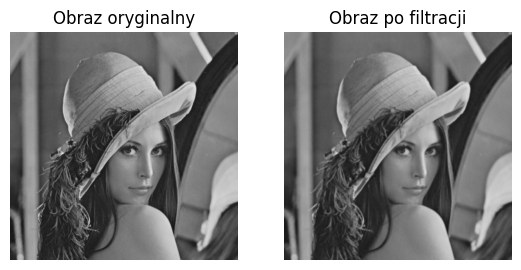

In [ ]:
gaussian_filtration(5,0.8)

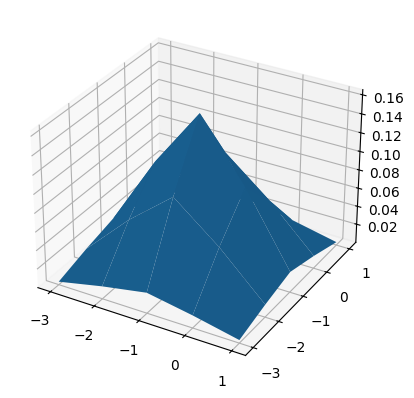

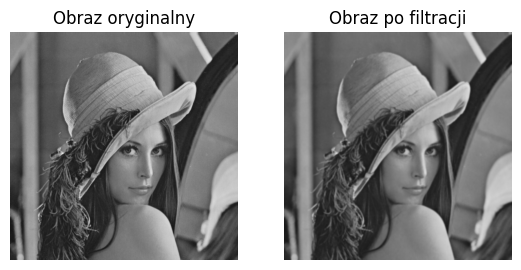

In [ ]:
gaussian_filtration(5,1.0)

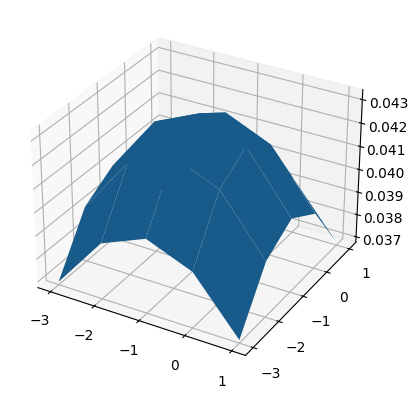

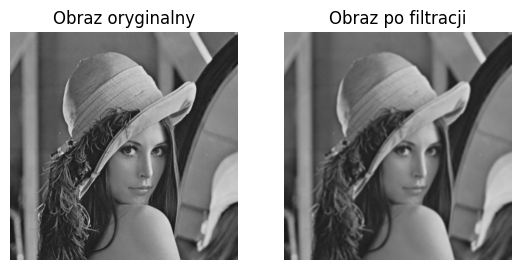

In [ ]:
gaussian_filtration(5,5.0)

### Filtry nieliniowe -- mediana

Filtry rozmywające redukują szum, ale niekorzystnie wpływają na ostrość obrazu.
Dlatego często wykorzystuje się filtry nieliniowe - np. filtr medianowy (dla przypomnienia: mediana - środkowa wartość w posortowanym ciągu liczb).

Podstawowa różnica pomiędzy filtrami liniowymi, a nieliniowymi polega na tym, że przy filtracji liniowej na nową wartość piksela ma wpływ wartość wszystkich pikseli z otoczenia (np. uśrednianie, czasem ważone), natomiast w przypadku filtracji nieliniowej jako nowy piksel wybierana jest któraś z wartości otoczenia - według jakiegoś wskaźnika (wartość największa, najmniejsza czy właśnie mediana).


1. Wczytaj obraz _lenaSzum.png_ (losowe 10% pikseli białych lub czarnych - tzw. zakłócenia impulsowe). Przeprowadź filtrację uśredniającą z rozmiarem maski 3x3. Wyświetl, podobnie jak wcześniej, oryginał, wynik filtracji i moduł z różnicy. Wykorzystując funkcję ``cv2.medianBlur` wykonaj filtrację medianową _lenaSzum.png_ (z rozmiarem maski $3 \times 3$). Wyświetl, podobnie jak wcześniej, oryginał, wynik filtracji i moduł z różnicy. Która filtracja lepiej radzi sobie z tego typu szumem?

  Uwaga. Taki sam efekt da również użycie funkcji `signal.medfilt2d`.


In [ ]:
def show_filter_nonlinear(image):
  filtered_image = cv2.medianBlur(image, 3)
  difference = cv2.absdiff(image, filtered_image)

  plt.figure(figsize=(12, 6))
  plt.subplot(1, 3, 1)
  plt.imshow(image, cmap='gray')
  plt.title('Obraz oryginalny')
  plt.axis('off')

  plt.subplot(1, 3, 2)
  plt.imshow(filtered_image, cmap='gray')
  plt.title('Obraz po filtracji')
  plt.axis('off')

  plt.subplot(1, 3, 3)
  plt.imshow(difference, cmap='gray')
  plt.title('Moduł z różnicy')
  plt.axis('off')


  plt.tight_layout()
  plt.show()


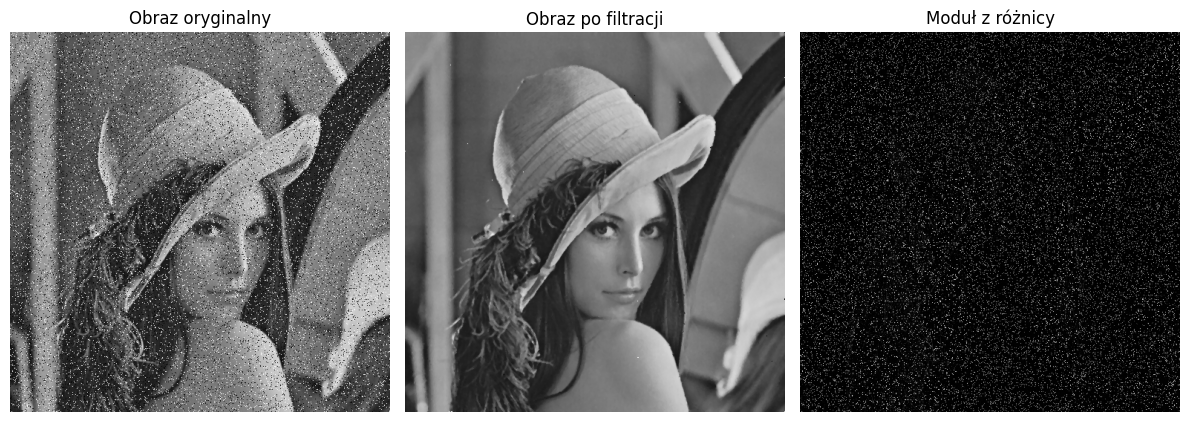

In [ ]:
lenaSzum = cv2.imread("lenaSzum.png")
show_filter_nonlinear(lenaSzum)

2. Przeprowadź filtrację uśredniającą, a następnie medianową obrazu _lena.png_.
   Wyniki porównaj - dla obu wyświetl: oryginał, wynik filtracji i moduł z różnicy.
   Szczególną uwagę zwróć na ostrość i krawędzie.
   W której filtracji krawędzie zostają lepiej zachowane?

In [ ]:
def compare_nonlinear_and_normal(image):
  filtered_image_nonlinear = cv2.medianBlur(image, 3)
  filtered_image_normal = cv2.GaussianBlur(image, (3,3), 2.0)

  plt.figure(figsize=(12, 6))
  plt.subplot(1, 3, 1)
  plt.imshow(image, cmap='gray')
  plt.title('Obraz oryginalny')
  plt.axis('off')

  plt.subplot(1, 3, 2)
  plt.imshow(filtered_image_nonlinear, cmap='gray')
  plt.title('Obraz po filtracji nieliniowej')
  plt.axis('off')

  plt.subplot(1, 3, 3)
  plt.imshow(filtered_image_normal, cmap='gray')
  plt.title('Obraz po filtracji usredniajacej')
  plt.axis('off')


  plt.tight_layout()
  plt.show()


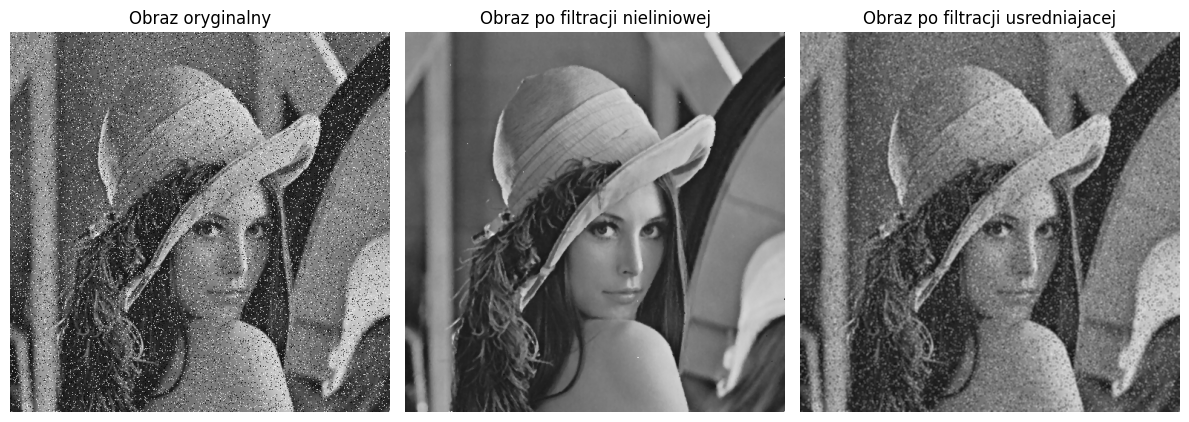

In [ ]:
compare_nonlinear_and_normal(lenaSzum)

3. Ciekawy efekt można uzyskać wykonując filtrację medianową wielokrotnie. Określa się go mianem  posteryzacji.  W wyniku przetwarzania z obrazka usunięte zostają detale, a duże obszary uzyskują tą samą wartość jasności.  Wykonaj operację mediany $5 \times 5$ na obrazie _lena.png_ 10-krotnie. (wykorzystaj np. pętlę `for`).

In [ ]:
def show_filter_nonlinear_x10(image):
  filtered_image = cv2.medianBlur(image, 3)

  for i in range(9):
    filtered_image = cv2.medianBlur(filtered_image, 5)

  plt.figure(figsize=(12, 6))
  plt.subplot(1, 3, 1)
  plt.imshow(image, cmap='gray')
  plt.title('Obraz oryginalny')
  plt.axis('off')

  plt.subplot(1, 3, 2)
  plt.imshow(filtered_image, cmap='gray')
  plt.title('Obraz po 10-krotnej filtracji')
  plt.axis('off')

  plt.tight_layout()
  plt.show()






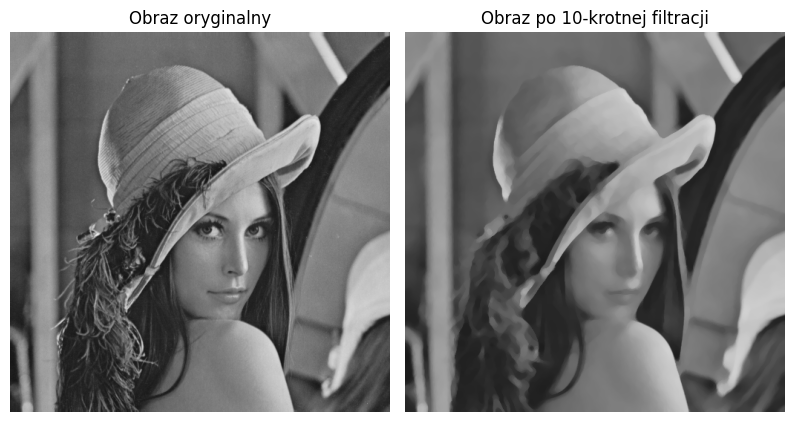

In [ ]:
show_filter_nonlinear_x10(lena)



Inne filtry nieliniowe:
- filtr modowy - moda (dominanta) zamiast mediany,
- filtr olimpijski - średnia z podzbioru otoczenia (bez wartości ekstremalnych),
- hybrydowy filtr medianowy - mediana obliczana osobno w różnych podzbiorach otoczenia (np. kształt ``x'',``+''), a jako wynik brana jest mediana ze zbioru wartość elementu centralnego, mediana z ``x'' i mediana z ``+'',
- filtr minimalny i maksymalny (będą omówione przy okazji operacji morfologicznych w dalszej części kursu).


Warto zdawać sobie sprawę, z szerokich możliwości dopasowywania rodzaju filtracji do konkretnego rozważanego problemu i rodzaju zaszumienia występującego na obrazie.

## Filtry liniowe górnoprzepustowe (wyostrzające, wykrywające krawędzie)

Zadaniem filtrów górnoprzepustowych jest wydobywanie z obrazu składników odpowiedzialnych za szybkie zmiany jasności - konturów, krawędzi, drobnych elementów tekstury.

### Laplasjan (wykorzystanie drugiej pochodnej obrazu)

1. Wczytaj obraz _moon.png_.

2. Wprowadź podstawową maskę laplasjanu:
\begin{equation}
M =
\begin{bmatrix}
0 & 1& 0 \\ 1 & -4 & 1 \\ 0 & 1 & 0
\end{bmatrix}
\end{equation}

3. Przed rozpoczęciem obliczeń należy dokonać normalizacji maski - dla rozmiaru $3 \times 3$ podzielić każdy element przez 9.
   Proszę zwrócić uwagę, że nie można tu zastosować takiej samej normalizacji, jak dla filtrów dolnoprzepustowanych, gdyż skutkowałby to dzieleniem przez 0.

4. Wykonaj konwolucję obrazu z maską (`c2.filter2D`). Przed wyświetleniem, wynikowy obraz należy poddać normalizacji (występują ujemne wartości). Najczęściej wykonuje się jedną z dwóch operacji:
- skalowanie (np. poprzez dodatnie 128 do każdego z pikseli),
- moduł (wartość bezwzględna).

Wykonaj obie normalizacje.
Na wspólnym wykresie wyświetl obraz oryginalny oraz przefiltrowany po obu normalizacjach.

In [ ]:
#1
moon = cv2.imread("moon.png")

In [ ]:
def show_filter_laplasyan(image):
  #2
  kernel = np.array([
      [0, 1, 0],
      [1,-4, 1],
      [0, 1, 0]
  ])

  #4
  filtered_image = cv2.filter2D(moon, -1, kernel, borderType=cv2.BORDER_DEFAULT)

  #5
  abs_filtered_image = abs(filtered_image)

  added_128_filtered_image = filtered_image + 128

  plt.figure(figsize=(12, 6))
  plt.subplot(1, 3, 1)
  plt.imshow(image, cmap='gray')
  plt.title('Obraz oryginalny')
  plt.axis('off')

  plt.subplot(1, 3, 2)
  plt.imshow(abs_filtered_image, cmap='gray')
  plt.title('Obraz po normalizacji abs')
  plt.axis('off')

  plt.subplot(1, 3, 3)
  plt.imshow(added_128_filtered_image, cmap='gray')
  plt.title('Obraz po normalizacji dodaniem 128')
  plt.axis('off')

  plt.tight_layout()
  plt.show()

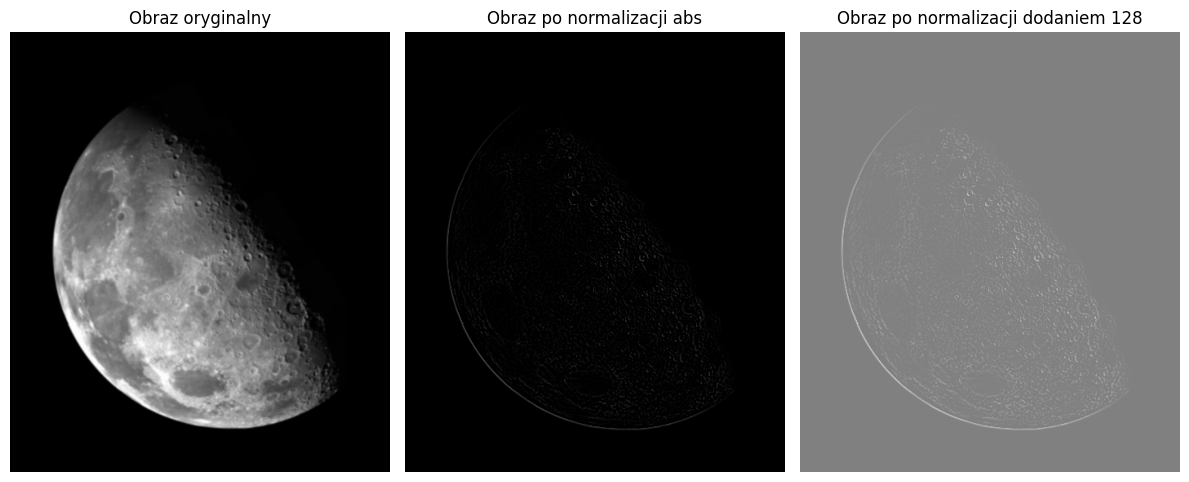

In [ ]:
show_filter_laplasyan(moon)

7. Efekt wyostrzenia uzyskuje się po odjęciu/dodaniu (zależy do maski) rezultatu filtracji laplasjanowej i oryginalnego obrazu. Wyświetl na jednym wykresie: obraz oryginalny, sumę oryginału i wyniku filtracji oraz różnicę (bezwzględną) oryginału i wyniku filtracji.
 Uwaga. Aby uniknąć artefaktów, należy obraz wejściowy przekonwertować do formatu ze znakiem.



In [ ]:
def show_high_resolution(image):
  #2
  kernel = np.array([
      [0, 1, 0],
      [1,-4, 1],
      [0, 1, 0]
  ])

  #4
  filtered_image = cv2.filter2D(moon, -1, kernel, borderType=cv2.BORDER_DEFAULT)

  #5
  abs_filtered_image = abs(filtered_image)

  # added_128_filtered_image = filtered_image + 128

  image_mask_sum = image.astype(np.int32) + abs_filtered_image
  image_mask_diff = abs(image.astype(np.int32) - abs_filtered_image)

  plt.figure(figsize=(12, 6))
  plt.subplot(1, 3, 1)
  plt.imshow(image, cmap='gray')
  plt.title('Obraz oryginalny')
  plt.axis('off')

  plt.subplot(1, 3, 2)
  plt.imshow(image_mask_sum, cmap='gray')
  plt.title('Suma')
  plt.axis('off')

  plt.subplot(1, 3, 3)
  plt.imshow(image_mask_diff, cmap='gray')
  plt.title('Róznica')
  plt.axis('off')

  plt.tight_layout()
  plt.show()


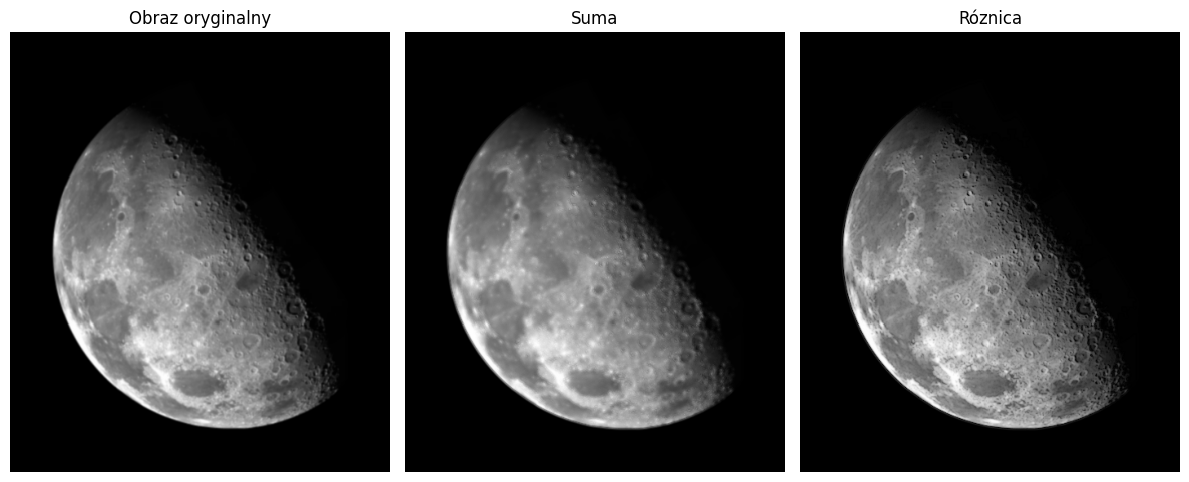

In [ ]:
show_high_resolution(moon)

### Gradienty (wykorzystanie pierwszej pochodnej obrazu)

1. Wczytaj obraz _kw.png_. Stwórz odpowiednie maski opisane w kolejnych punktach i dokonaj filtracji.
2. Wykorzystując gradient Robertsa przeprowadź detekcję krawędzi - poprzez wykonanie konwolucji obrazu z daną maską:
\begin{equation}
R1 = \begin{bmatrix} 0 & 0 & 0 \\ -1 & 0 & 0 \\ 0 & 1 & 0 \end{bmatrix}   
R2 = \begin{bmatrix} 0 & 0 & 0 \\ 0 & 0 & -1 \\ 0 & 1 & 0 \end{bmatrix}
\end{equation}

Wykorzystaj stworzony wcześniej kod (przy laplasjanie) - dwie metody normalizacji oraz sposób wyświetlania.

3. Analogicznie przeprowadź detekcję krawędzi za pomocą gradientu Prewitta (pionowy i poziomy)
\begin{equation}
P1 = \begin{bmatrix} -1 & 0 & 1 \\ -1 & 0 & 1 \\ -1 & 0 & 1 \end{bmatrix}   
P2 = \begin{bmatrix} -1 & -1 & -1 \\ 0 & 0 & 0 \\ 1 & 1 & 1 \end{bmatrix}
\end{equation}

4. Podobnie skonstruowany jest gradient Sobela (występuje osiem masek, zaprezentowane są dwie ``prostopadłe''):
\begin{equation}
S1 = \begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix}   
S2 = \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{bmatrix}
\end{equation}

Przeprowadź detekcję krawędzi za pomocą gradientu Sobela.

In [ ]:
kw = cv2.imread("kw.png")

r1 = np.array([
    [0,0,0],[-1,0,0],[0,1,0]
])

r2 = np.array([
    [0,0,0],[0,0,-1],[0,1,0]
])

p1 = np.array([
    [-1,0,1],[-1,0,1],[-1,0,1]
])

p2 = np.array([
    [-1,-1,-1],[0,0,0],[1,1,1]
])

s1 = np.array([
    [-1,0,1],[-2,0,2],[-1,0,1]
])

s2 = np.array([
    [-1,-2,-1],[0,0,0],[1,2,1]
])

In [ ]:
def apply_convolution(image, kernel):
  filtered_image = cv2.filter2D(image, -1, kernel, borderType=cv2.BORDER_DEFAULT)

  abs_filtered_image = abs(filtered_image)

  added_128_filtered_image = filtered_image.astype('int16') + 128

  plt.figure(figsize=(12, 6))
  plt.subplot(1, 3, 1)
  plt.imshow(image, cmap='gray')
  plt.title('Obraz oryginalny')
  plt.axis('off')

  plt.subplot(1, 3, 2)
  plt.imshow(abs_filtered_image, cmap='gray')
  plt.title('Obraz po normalizacji abs')
  plt.axis('off')

  plt.subplot(1, 3, 3)
  plt.imshow(added_128_filtered_image, cmap='gray')
  plt.title('Obraz po normalizacji dodaniem 128')
  plt.axis('off')

  plt.tight_layout()
  plt.show()

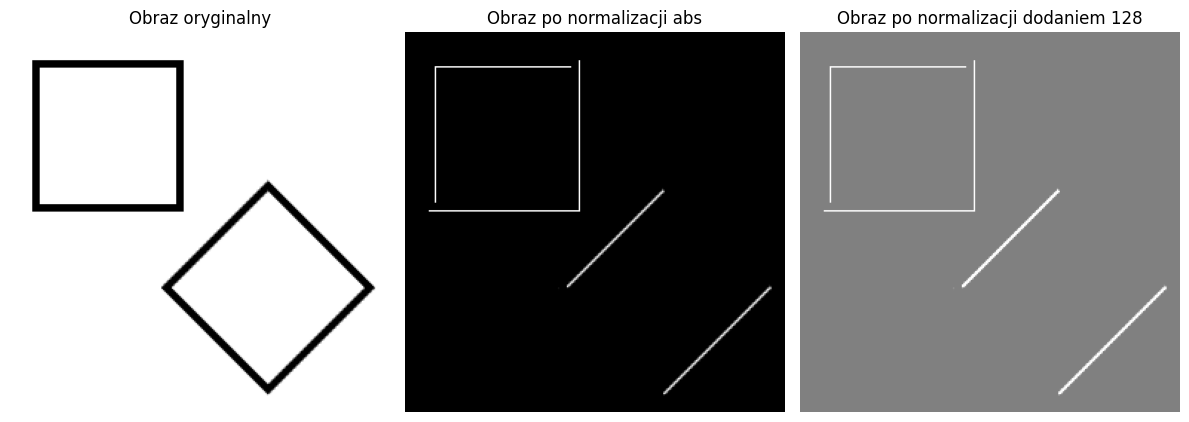

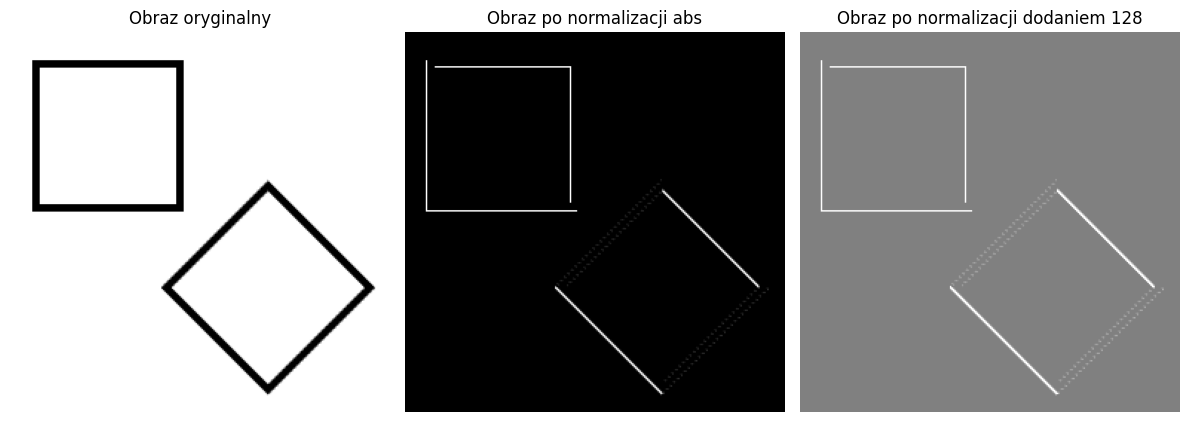

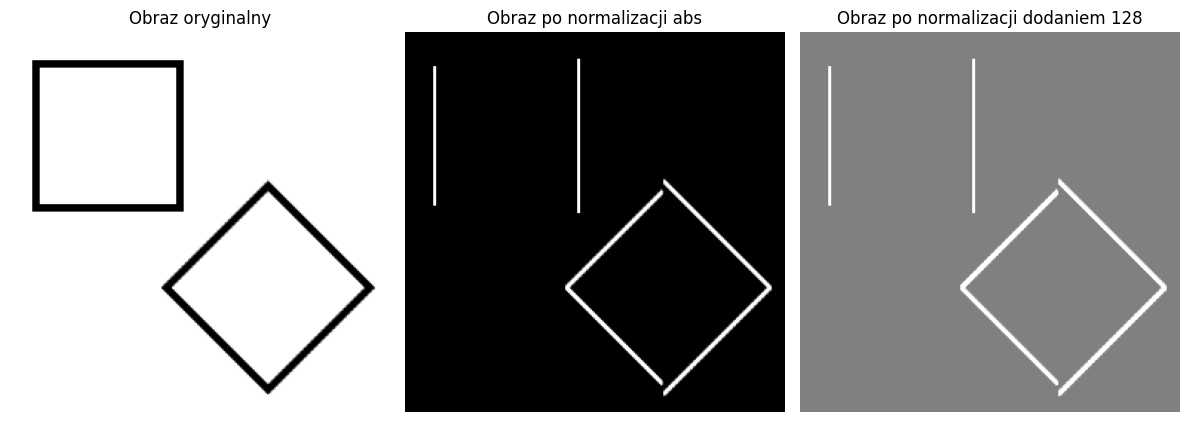

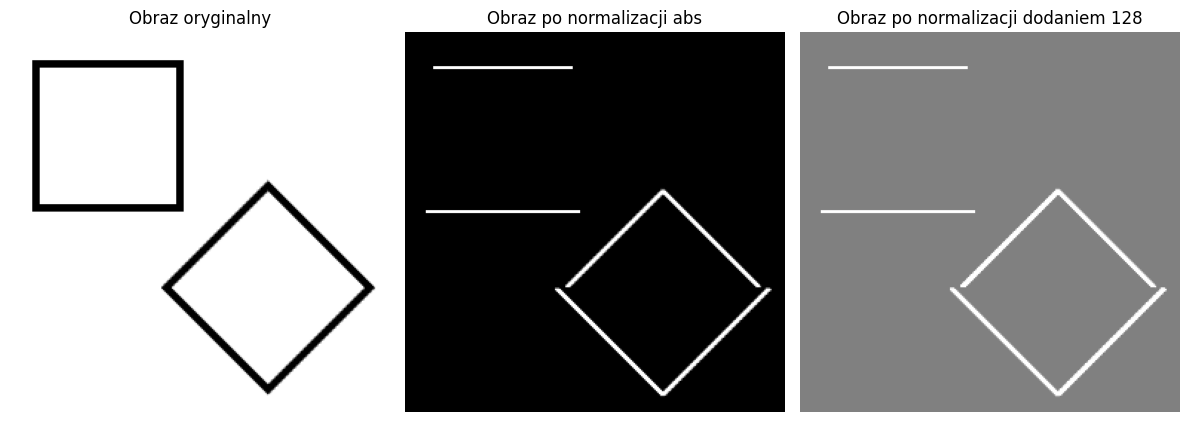

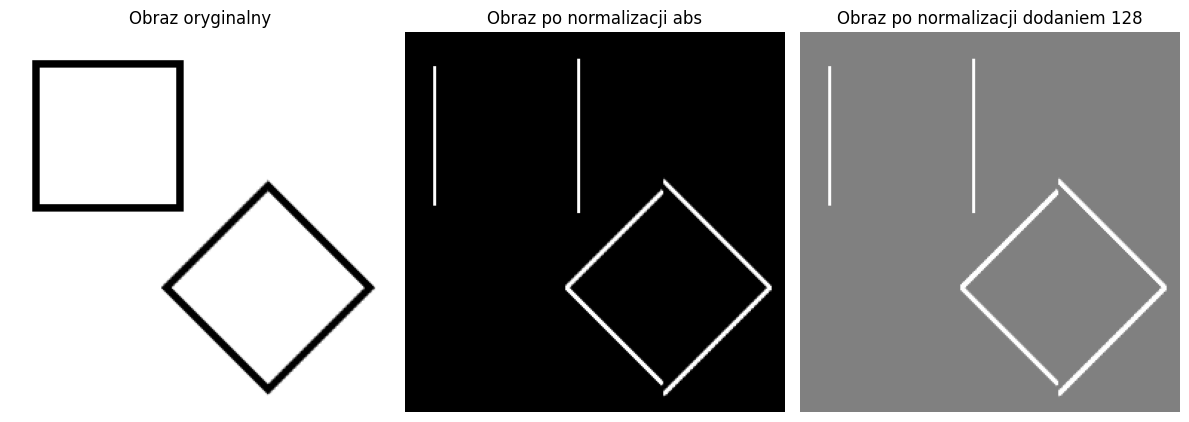

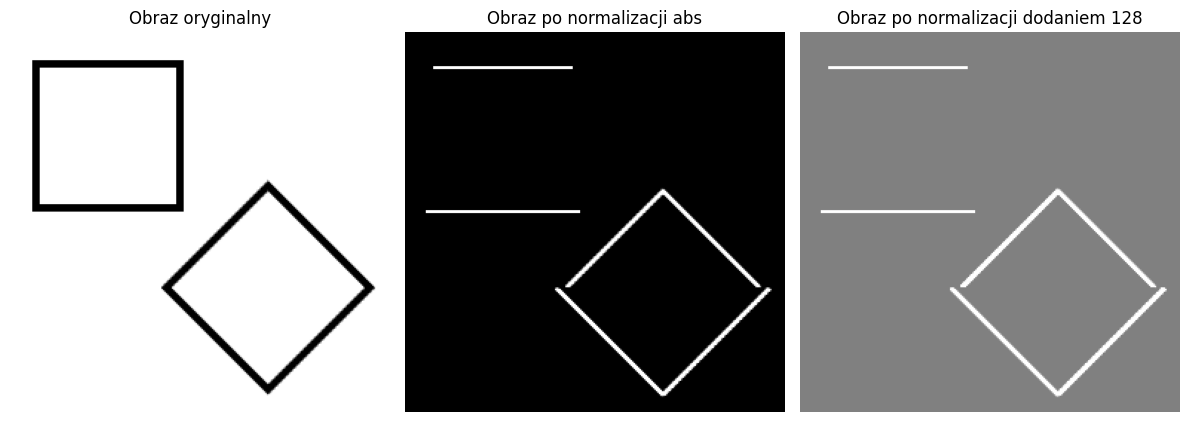

In [ ]:
apply_convolution(kw,r1)
apply_convolution(kw,r2)
apply_convolution(kw,p1)
apply_convolution(kw,p2)
apply_convolution(kw,s1)
apply_convolution(kw,s2)

5. Na podstawie dwóch ortogonalnych masek np. Sobela można stworzyć tzw. filtr kombinowany - pierwiastek kwadratowy z sumy kwadratów gradientów:
\begin{equation}
OW = \sqrt{(O * S1)^2 + (O * S2)^2}
\end{equation}
gdzie:  $OW$ - obraz wyjściowy, $O$ - obraz oryginalny (wejściowy), $S1,S2$ - maski Sobela, $*$ - operacja konwolucji.

Zaimplementuj filtr kombinowany.

Uwaga. Proszę zwrócić uwagę na konieczność zmiany formatu danych obrazu wejściowego - na typ znakiem



In [ ]:
def conv_squared(image,kernel):
  return np.square(cv2.filter2D(image, -1, kernel, borderType=cv2.BORDER_DEFAULT).astype(np.int32))

def conv_abs(image,kernel):
  return np.abs(cv2.filter2D(image, -1, kernel, borderType=cv2.BORDER_DEFAULT).astype(np.int32))

def apply_combined_filter(image, kernel1, kernel2,comb_type="squared"):

  if comb_type == "squared":
    filtered_image = np.sqrt(conv_squared(image,kernel1) + conv_squared(image, kernel2))
  else:
    filtered_image = conv_abs(image,kernel1) + conv_abs(image,kernel2)

  abs_filtered_image = abs(filtered_image)
  abs_filtered_image = cv2.normalize(abs_filtered_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)


  plt.figure(figsize=(12, 6))
  plt.subplot(1, 3, 1)
  plt.imshow(image, cmap='gray')
  plt.title('Obraz oryginalny')
  plt.axis('off')

  plt.subplot(1, 3, 2)
  plt.imshow(abs_filtered_image, cmap='gray')
  plt.title('Obraz po normalizacji abs')
  plt.axis('off')

  plt.tight_layout()
  plt.show()


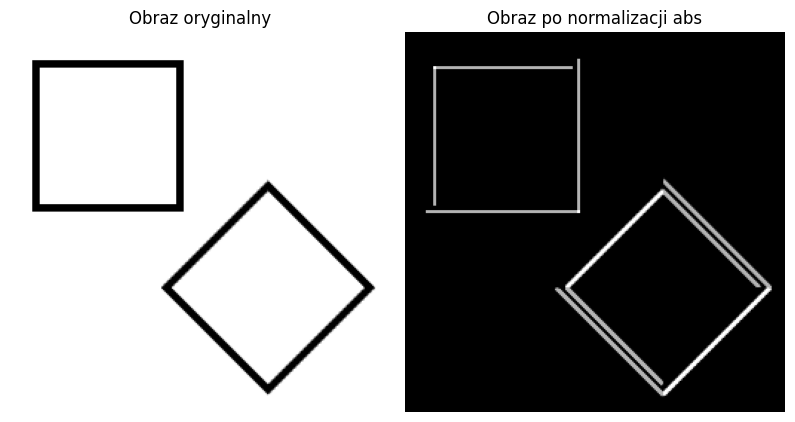

In [ ]:
apply_combined_filter(kw,s1,s2)

6. Istnieje alternatywna wersja filtra kombinowanego, która zamiast pierwiastka z sumy kwadratów wykorzystuje sumę modułów (prostsze obliczenia).
Zaimplementuj tę wersję.

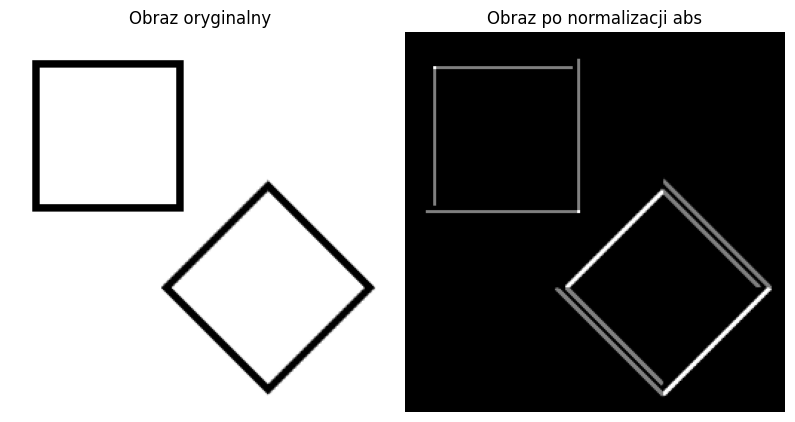

In [ ]:
apply_combined_filter(kw,s1,s2,comb_type="abs")

7. Wczytaj plik _jet.png_ (zamiast _kw.png_).
Sprawdź działanie obu wariantów filtracji kombinowanej.

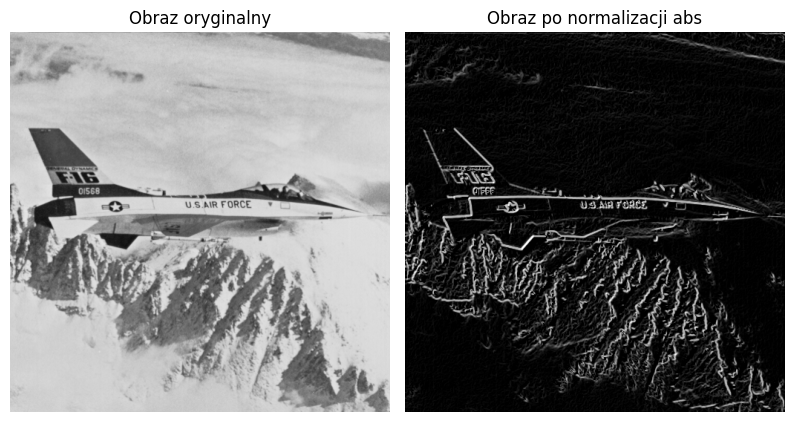

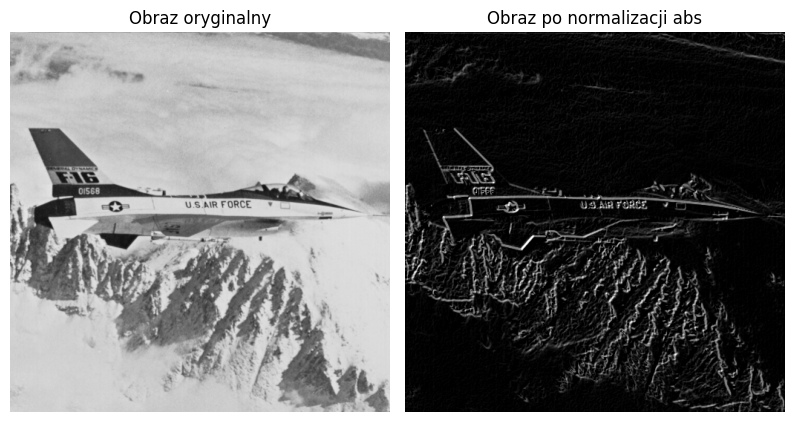

In [ ]:
jet = cv2.imread("jet.png")

apply_combined_filter(jet,s1,s2)
apply_combined_filter(jet,s1,s2,comb_type="abs")